# Intro to MATLAB 

Please warn me of any errors, typos, inconsistencies, etc. Better yet: if you feel energetic, fix it and submit a github pull request. 


## Almost everything is a Matrix

In MATLAB, the most common data type is a matrix of real (or more precisely, floating point) numbers.


All the following commands create an object of the type Matrix, with floating point elements:


In [1]:
u = [1,2.5,3]; % Ending with semicolon suppresses output
A = [1 2 3; 4 5 6];
b = 2.5;
c = pi;

You can check that by using the command `size` to inspect the dimension of the output:


In [2]:
size(u)
size(A)
size(b)
size(c)


ans =

     1     3


ans =

     2     3


ans =

     1     1


ans =

     1     1



So all of the above are stored as 2x2 matrices. Even scalars like `b` and `c`! 


In reality, there are other data types. For example: 

-  **higher dimension arrays**

   $n_1 \times n_2 \times \ldots \times n_k$ objects.
-  **structs**

   group sub-objects of any type. 
-  **characters/strings**

   store text
-  **tables**

   as the name suggests, stores objects in such a way that elements in a column are of the same type, columns are the same size, but types can differ across columns. 
  
  
## Basic matrix commands

-   **zeros**

    generates a matrix of zeros of specified dimension. Example: 

In [3]:
zeros(2,2)
zeros(3,1)


ans =

     0     0
     0     0


ans =

     0
     0
     0



-   **ones** 
   
    similar to `zeros`, but with ones
    
-   **diag** 

    behavior depends on what is inputted: 
    
    *  *row* or *column* vector: creates a diagonal matrix whose main diagonal consists of those elements. 
    *  *matrix*: extracts the main diagonal from the matrix
    
    Examples: 

In [4]:
% Supply a vector
my_vec = [1,2,5]
diag(my_vec)


my_vec =

     1     2     5


ans =

     1     0     0
     0     2     0
     0     0     5



In [5]:
% Supply a (possibly non-square) matrix
my_mat = [1,2,3;4,5,7] 
diag(my_mat)


my_mat =

     1     2     3
     4     5     7


ans =

     1
     5



## Accessing elements

To access element i,j of a matrix `M`, use `M(i,j)`. 

In [6]:
M = [10 2 5; 42 1 1];

M(2,1)


ans =

    42



Note: for this to work, indices must be "in bounds", i.e., if your matrix is $n\times m$, make sure $i \in \{1,\ldots, n\}$ and $j \in \{1,\ldots, m\}$. 


In the above case, for example `M(5,1)` will give an error because the matrix has 2 rows and we're trying to access row number 5: 

In [7]:
M(5,1)

Index in position 1 exceeds array bounds (must not exceed 2).



## Random numbers

In many applications, we need to generate random numbers of a given probability distribution

MATLAB has some built-in random number generators.


**Uniform[0,1]**


In [8]:
unif_number = rand          
unif_square_mat = rand(3)   
unif_general_mat = rand(3,5)


unif_number =

    0.8147


unif_square_mat =

    0.9058    0.6324    0.5469
    0.1270    0.0975    0.9575
    0.9134    0.2785    0.9649


unif_general_mat =

    0.1576    0.4854    0.4218    0.9595    0.8491
    0.9706    0.8003    0.9157    0.6557    0.9340
    0.9572    0.1419    0.7922    0.0357    0.6787



----

**Normal(0,1)**



In [9]:
stdnorm_number = randn          
stdnorm_square_mat = randn(3)   
stdnorm_general_mat = randn(3,5)


stdnorm_number =

    1.0347


stdnorm_square_mat =

    0.7269   -0.7873   -1.0689
   -0.3034    0.8884   -0.8095
    0.2939   -1.1471   -2.9443


stdnorm_general_mat =

    1.4384    1.3703   -0.2414   -0.8649    0.6277
    0.3252   -1.7115    0.3192   -0.0301    1.0933
   -0.7549   -0.1022    0.3129   -0.1649    1.1093



-----

Importantly, every subsequent draw of a random number, within a vector or otherwise, is *independent* of previous draws. 



### Seeding and reproducibility


Note that if I type ~rand~ here and you do the same on your computer, the output will be two different numbers. 

Problem: if I haven't seen you actually generate the number, how do I know it's random?

If my results depend on simulation, I might have just made up random-looking numbers that have some desired output. To avoid raising that type of suspicion, *always seed code that uses simulations*.

Command `rng` sets a random number generator *seed*: 

In [10]:
rng(123)               
                       
my_random_number = rand


my_random_number =

    0.6965



If you use the same seed (123, in this case), the random draw above should yield 0.6965 on anyone's computer. 

### Exercises


1.  Create a 15x1 vector where each component is drawn independent from a Uniform[0, 1] distribution
2.  Create a 2x2 matrix where all elements but (2,1) are independent standard normal, and entry (2,1) is uniform[0,1].
3.  Create a 2x2 matrix where all elements are drawn independent U[-1, 2]
4.  Create a 2x2 matrix where all elements are drawn independent N(1, 0.16)
5.  Create a vector, with arbitrary length, where each entry is one of
   $\{1,2,3,4\}$ according to the probability specification (0.01, 0.09,
   0.8, 0.1).
6.  How do you tell if the draw in (5) was reasonable?



See the end of this notebook for suggested answers.

## Plotting

The main plotting command for 2d plots (which is the one you'll use the most in this course) is `plot`. 

As an example, let's plot the square function for integers from 1 to 100 in several different ways. 


The plain vanilla plot command yields the following. 

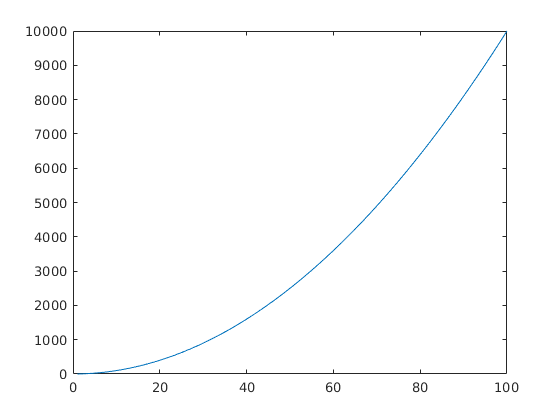

In [11]:
x = 1:100;
y = x.^2;

figure; % Start a new plotting instance (not strictly necessary if this is the
        % first plot)
plot(x,y);


Note how matlab created a line through the points. That's the default behavior, but you can change that with the third argument of the `plot` function. For example: 

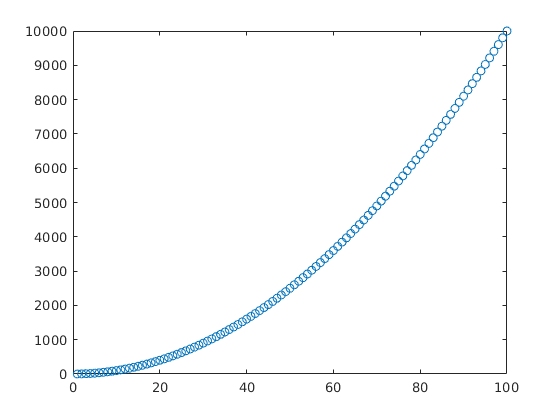

In [12]:
plot(x,y, 'o');

That literally plots o's instead of a line. You can use `'--'` for a dashed line, `'-.'` for a dashed-dotted line, '+' for pluses, among other options
    
To set a color, append the starting letter of a sufficiently normal color (exception: to plot in black, use 'k'). For example, `'--r'` will set a red dashed line. 

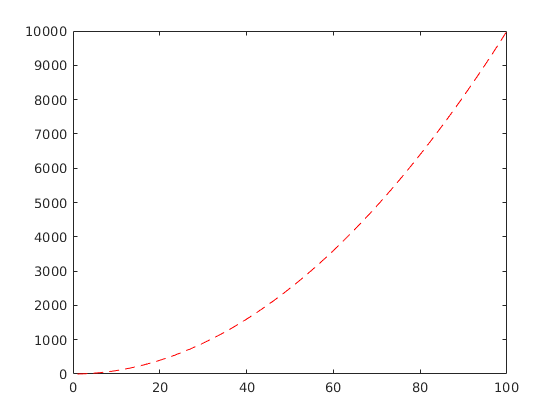

In [13]:
plot(x,y, '--r');

### Comparing curves

One important use case of plotting commands is to compare the shapes and values of curves. 

There are two major ways of proceeding. 

1. Two curves in the same plot window
2. Subplots


Option 1 is achieved the `hold on` command. Simply type `hold on;` every subsequent plot is going to appear in the same plot window: 


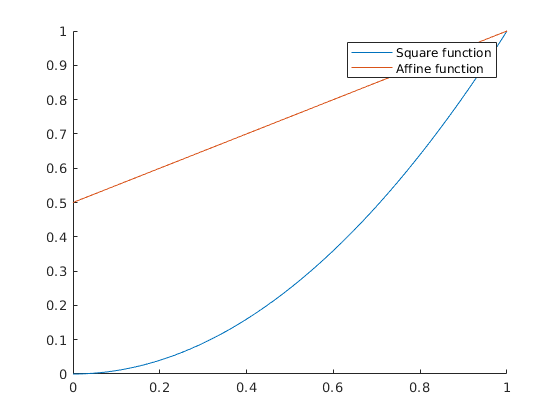

In [14]:
x = linspace(0, 1, 100); % Creates equally spaced range between 0 and 1 with 100 points
y = x.^2;
z = 0.5 + x/2;

figure;                                     
hold on;                                    
plot(x,y);                                  
plot(x,z);                                  
                                            
legend('Square function', 'Affine function')

Option 2 is achieved with the `subplot` command. One example is below (explanation comes after): 



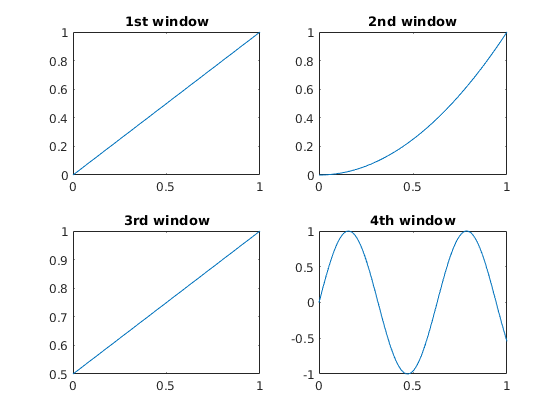

In [15]:
figure;
subplot(2,2,1)
plot(x, x) % Plots the y=x function
title('1st window')

subplot(2,2,2)
plot(x, y) % Remember: y = x.^2
title('2nd window')

subplot(2,2,3)
plot(x, z) % Remember: z = 0.5 + x/2
title('3rd window')

subplot(2,2,4)
plot(x, sin(10*x))
title('4th window')


The first two arguments to `subplot` define the grid of subplots. In this case, we use `2,2`, meaning it generates a 2 by 2 grid of subplots. 

The third argument selects which subplot window to plot on. So `subplot(2,2,1)` 
selects the first (top left) window; `subplot(2,2,2)` selects the second window (top right). 

The way `subplot` orders the windows is *by row*. 

## Two ways of plotting the density of a $\chi^2$ distribution

There are roughly two ways of plotting the density of a random variable

1. **If you can *sample* from this variable**: take a very large sample and create a histogram. The `histogram` command achieves this.
2. **If you know a closed-form expression for the density function**: choose a reasonable support, form a grid of points covering the support and use the `plot` command.

In this section, we'll apply it to a $\chi^2(q)$ distribution. Let's take $q=4$ for example.


### Histogram approach
Remember that a $\chi^2(q)$ is has a distribution identical to the sum of $q$ independent standard normal random variables.

In our case, to generate a sample of $\chi^2(4)$, we need to draw 4 independent normal random variables $N$ times. 

We can use the `randn` command to find a 4xN matrix with independent normal entries:

In [16]:
rng(123); % for reproducibility

q = 4;
N = 10000; % sample size
sampmat = randn(q, N);

% Show first 10 columns
sampmat(:,1:10)



ans =

  Columns 1 through 7

    0.7643    0.6680   -0.0329   -0.1337   -0.9109    0.3199    0.6204
   -0.6050   -0.3235   -0.2951   -1.6757   -0.4629    1.0635   -0.6453
   -1.0350    1.3343   -0.5548   -0.3487    0.1227    0.9011   -0.3651
    0.2014    0.6214    0.5644    0.8456    0.0900    0.2872   -0.5834

  Columns 8 through 10

   -1.3698   -0.1307   -0.2998
    0.5432   -0.0114    1.4971
   -1.7078   -0.1020    1.3880
   -0.0646   -0.9234    0.0054



Now we can square all elements, and do row-wise sum using the function `sum`:

In [17]:
sampmat_sq = sampmat .^ 2; % compute element-wise square
samp = sum(sampmat_sq, 1); 
samp(:, 1:10) % show first ten elements


ans =

  Columns 1 through 7

    2.0620    2.7175    0.7145    3.6625    1.0673    2.1279    1.2749

  Columns 8 through 10

    5.0921    0.8802    4.2579






That's it! In the variable `samp`, we have an independent sample of $\chi^2(4)$! Let's do the histogram:


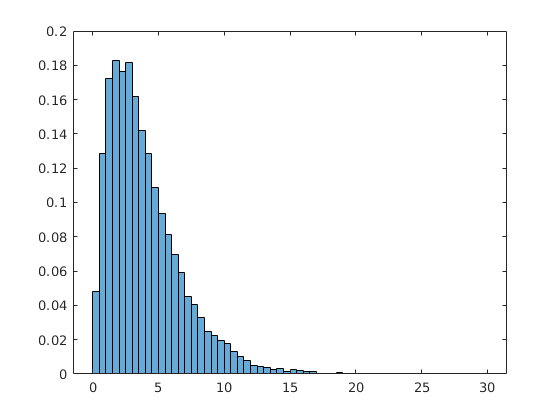

In [18]:
figure;
histogram(samp, 'Normalization', 'pdf')

Two comments on the above: 
1. We have to set option `'Normalization'` to `'pdf'` to have a result
   that is comparable to the pdf. Without setting this, `histogram`
   defaults to showing the *count* of sample points in each bin. 
2. The default style is a bar plot but you can tweak it. Check the histogram documentation in the MATLAB page. [Documentation](https://www.mathworks.com/help/matlab/ref/matlab.graphics.chart.primitive.histogram.html)



### Closed form approach

From Wikipedia, the pdf of a $\chi^2(4)$ random variable is
    $$
    f(x, q) = \frac{1}{2^{q/2} \Gamma(q/2) } x^{q/2 - 1} e^{-x/2} 
    $$

I arbitrarily set the domain to [0,30] and plot 100 points: 


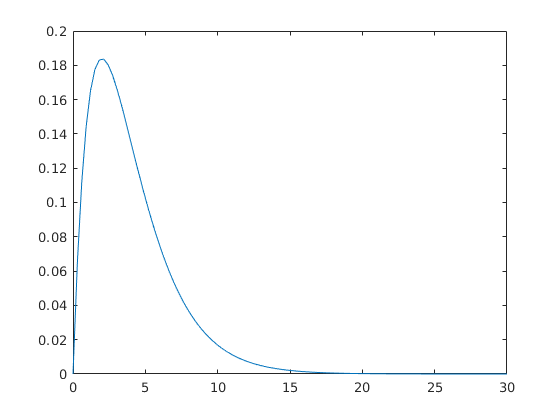

In [19]:
xmax = 30;
npoints = 100;
q = 4;

x = linspace(0, xmax, npoints);

integr_const = 2^(q/2) * gamma(q/2);
y = x.^(q/2 - 1) .* exp(-x/2)  /  integr_const;

figure;
plot(x, y)


### Comparing the two

Let's apply the knowledge from the previous sections to compare the two plots. 



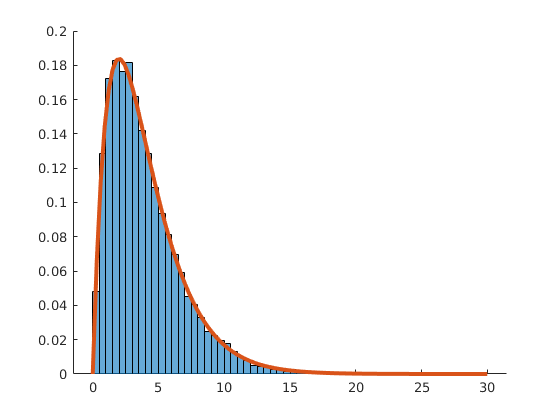

In [20]:

figure;
hold on;
histogram(samp, 'Normalization', 'pdf') 
plot(x, y, 'LineWidth', 3)


# Answers to exercises

1. Create a 15x1 vector where each component is drawn independent from a Uniform[0, 1] distribution

   **A:** Use rand command. ~randn(15, 1)~ should do the trick.


2. Create a 2x2 matrix where all elements but (2,1) are independent standard normal, and entry (2,1) is uniform[0,1].

   **A:** Create a 2x2 standard normal matrix, substitute element (2,1):

In [21]:
rng(44)
m2 = randn(2,2);
m2(2,1) = rand


m2 =

    0.9517    0.8655
    0.3593   -0.2708



3. Create a 2x2 matrix where all elements are drawn independent U[-1, 2]

   **A.** Expand the uniform to [0,3] and translate by -1: 

In [22]:
rng(44) % For reproducibility

m3_init = rand(2,2);
m3 = m3_init * 3 - 1


m3 =

    1.5045    1.2339
   -0.6856    0.0815



4.  Create a 2x2 matrix where all elements are drawn independent N(1, 0.16)

    **A.** Do a similar shift/expand trick. Remember that if $X \sim N(0,1)$, then
    
    $$\sigma X + \mu \sim N(\mu, \sigma^2)$$
    
    In MATLAB: 

In [23]:
rng(44);  % For reproducibility

sig = sqrt(0.16);
mu = 1;

m4_init = randn(2,2);
m4 = mu + sig *  m4_init



m4 =

    1.3807    1.3462
    0.8389    0.8917



5.  Create a vector, with arbitrary length, where each entry is one of      $\{1,2,3,4\}$ according to the probability mass specification (0.01, 0.09,
     0.8, 0.1)
     
     **A.** Let $\mathbf p = (0.01, 0.09, 0.8, 0.1)$. Take a uniform random draw from
     [0,1], say $U$. Then consider the following rule: 
     
     $$
     F(U) = \begin{cases} 
         1 & \text{if } U \leq 0.01 \\
         2 & \text{if } 0.01 < U \leq 0.01 + 0.09 \\
         3 & \text{if } 0.01 + 0.09 < U \leq 0.01 + 0.09 + 0.8 \\
         4 & \text{if } 0.01 + 0.09 + 0.8 < U \leq 0.01 + 0.09 + 0.8 + 0.1 
     \end{cases}
     $$
     
     It's not hard to verify that $\Pr \{ F(U) = 1 \} = 0.01$, $\Pr \{ F(U) = 2 \} = 0.01$, $\Pr \{ F(U) = 3 \} = 0.8$ and $\Pr \{ F(U) = 4 \} = 0.1$. Now, how do we implement this? 
      
     Note that $F$ is basically comparing $U$ above against the *cumulative sum* of $p$. Matlab has a command for cumulative sums: 


In [24]:
p = [0.01, 0.09, 0.8, 0.1];
cum_p = cumsum(p)


cum_p =

    0.0100    0.1000    0.9000    1.0000



Let's define something slightly more general than $F$. We define a function that, for any u, finds the *first* entry of the cumulative sum of $\mathbf p$ smaller than U. This is done below, for general scalar u and vector p whose cumulative sum has been computed in advance.

I do this in the function `cumsum_findsmaller` below: 

In [25]:
% Tangled by intro_matlab_solutions.org

function jj = cumsum_findsmaller(u, cum_p)
    jj = 0;
    is_lower = false;
    while ~is_lower    % continue until is_lower becomes true
        jj = jj + 1;
        is_lower = (u <= cum_p(jj)); % logical variable: either 0 or 1
    end
end

Error: Function definition not supported in this context. Create functions in code file.



  - Convince yourself `cumsum_findsmaller` does exactly what $F$ above prescribes
  - For the above to work, we need the function to be in a separate file. I add it to `extracode/cumsum_findsmaller.m`, and add the directory to path below. 


In [26]:
addpath('extracode') % make sure `cumsum_findsmaller.m` is reachable

cumsum_findsmaller(0.005, cum_p) % should  be 1

cumsum_findsmaller(0.07, cum_p) %  should be 2

cumsum_findsmaller(0.5, cum_p)  % should be 3



ans =

     1


ans =

     2


ans =

     3



Seems about right. Now let's generate a sample, and output the first ten elements: 

In [27]:
rng(44)

sample_size = 1000;    % arbitrary sample size

tic;
store_sample = zeros(sample_size, 1); %  pre-allocate sample vector

for ii=1:sample_size
    U=rand;
    store_sample(ii)=cumsum_findsmaller(U, cum_p);
end
toc;

store_sample(1:10)

Elapsed time is 0.001677 seconds.

ans =

     3
     3
     3
     3
     3
     3
     3
     3
     3
     3



It's not at all surprising that all of them are 3, since 3 has an 80% chance of being drawn.


In terms of style, notice that the above solution has two loops: 

+ One inside the function `cumsum_findsmaller`        
+ The loop ranging from `ii=1:samplesize`.

That goes against the general advice that we should avoid this type of construction. How then would you proceed with built-in matrix operations?

One (obscure and non-intuitive) way of doing it without any loops is shown below: 

In [28]:
rng(44)

tic; 

unifsamp = rand(1, sample_size);
rep_matrix = repmat(unifsamp, 4, 1);
store_sample_v = sum(cum_p' < rep_matrix)+1;

toc;

store_sample_v(1:10)

Elapsed time is 0.001409 seconds.

ans =

     3     3     3     3     3     3     3     3     3     3



6.  How do you tell if the draw in (5) was reasonable?

    **A.** We can check, for example, the frequency that number $3$ shows up. Because it has probability 80%, we'd expect the relative frequency to be around 80%. This is checked below:

In [29]:
sum(store_sample == 3) / length(store_sample)
sum(store_sample_v == 3) / length(store_sample_v)


ans =

    0.8060


ans =

    0.8060



Which is around 80% of the time, indicating that we're sampling from the right distribution.